# Time Series Analysis

## Libraries and Datasets

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from pandas import Series

% matplotlib inline
import warnings 
warnings.filterwarnings('ignore')

UsageError: Line magic function `%` not found.


In [3]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

train_original =  train.copy()
test_original =  test.copy()

## EDA

In [4]:
train.columns

Index(['ID', 'Datetime', 'Count'], dtype='object')

In [5]:
train.shape

(18288, 3)

In [6]:
train.dtypes

ID           int64
Datetime    object
Count        int64
dtype: object

In [7]:
test.columns

Index(['ID', 'Datetime'], dtype='object')

In [8]:
test.shape

(5112, 2)

In [9]:
test.dtypes

ID           int64
Datetime    object
dtype: object

## Feature Engineering

In [10]:
train['Datetime'] = pd.to_datetime(train.Datetime,format = '%d-%m-%Y %H:%M')
test['Datetime'] = pd.to_datetime(test.Datetime, format = '%d-%m-%Y %H:%M')

In [11]:
test_original['Datetime'] = pd.to_datetime(train_original.Datetime , format= '%d-%m-%Y %H:%M')
train_original['Datetime'] = pd.to_datetime(test_original.Datetime , format= '%d-%m-%Y %H:%M')

In [12]:
for i in(train,test_original,test,train_original):
    i['year'] = i.Datetime.dt.year
    i['month'] = i.Datetime.dt.month
    i['day'] = i.Datetime.dt.day
    i['Hour'] = i.Datetime.dt.hour

In [13]:
train['dayofweek'] = train['Datetime'].dt.dayofweek
temp = train['Datetime']

In [14]:
def applyer(row):
    if row.dayofweek == 5 or row.dayofweek == 6:
        return 1
    else:
        return 0

temp2 = train.Datetime.apply(applyer)
train['weekend'] = temp2

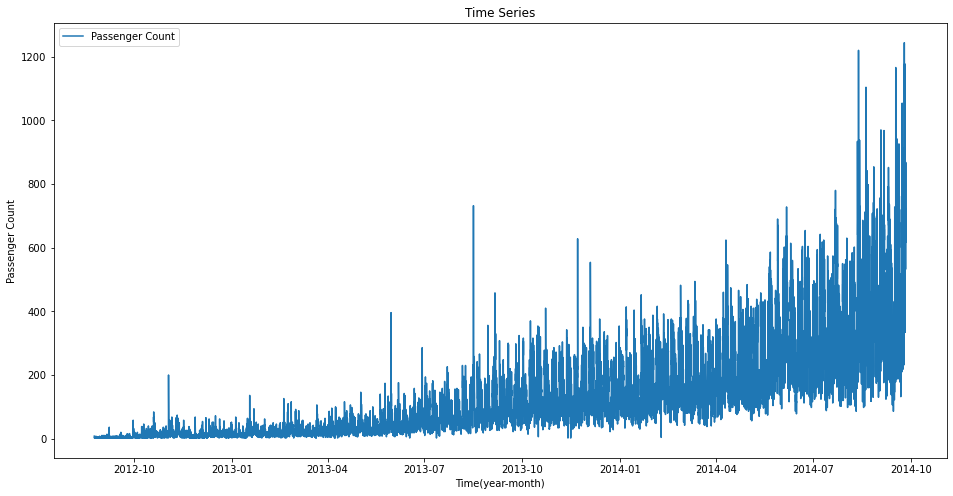

In [15]:
train.index = train.Datetime
df =  train.drop(columns='ID')
ts = df['Count']
plt.figure(figsize = (16,8))
plt.plot(ts,label = 'Passenger Count')
plt.title('Time Series')
plt.xlabel('Time(year-month)')
plt.ylabel('Passenger Count')
plt.legend(loc = 'best')

### exploratory analysis

<AxesSubplot:xlabel='year'>

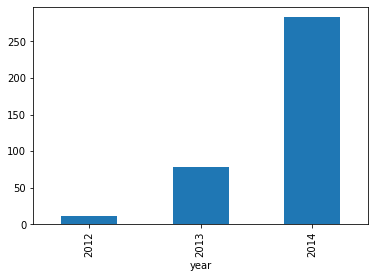

In [16]:
train.groupby('year')['Count'].mean().plot.bar()

There was a increase of trafic from 2012- 2014

<AxesSubplot:xlabel='month'>

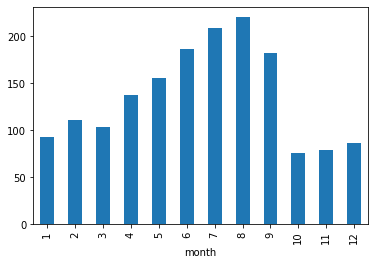

In [17]:
train.groupby('month')['Count'].mean().plot.bar()

Many people travel during the months of June to August

<AxesSubplot:title={'center':'Passenger Count(Monthwise)'}, xlabel='year,month'>

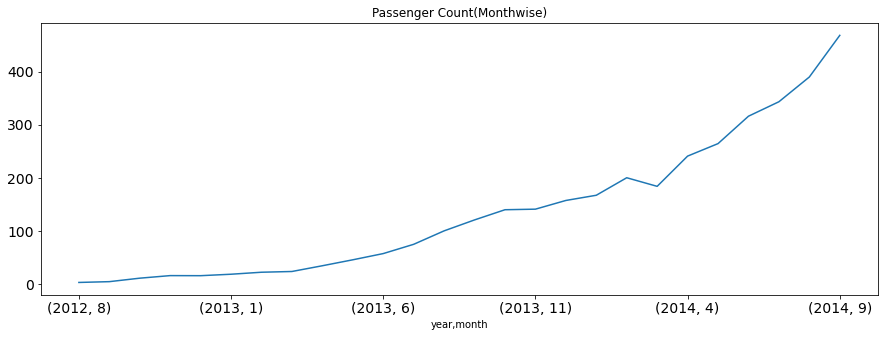

In [18]:
temp = train.groupby(['year','month'])['Count'].mean()
temp.plot(figsize=(15,5),title = 'Passenger Count(Monthwise)',fontsize=14)


there is a gradual increase of in traffic from the year 2012 -2014 

<AxesSubplot:xlabel='day'>

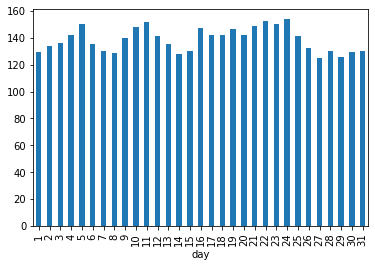

In [19]:
train.groupby('day')['Count'].mean().plot.bar()

<AxesSubplot:xlabel='Hour'>

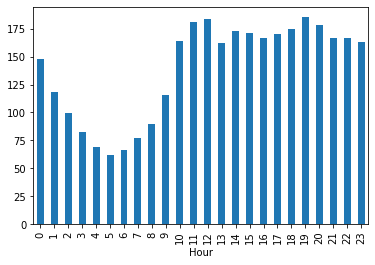

In [20]:
train.groupby('Hour')['Count'].mean().plot.bar()

- 5 am is the least travelled time of the day
- while 11am - 11pm is the most travelled.

<AxesSubplot:xlabel='weekend'>

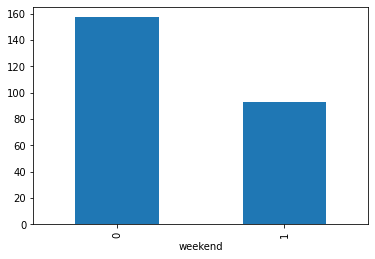

In [21]:
train.groupby('weekend')['Count'].mean().plot.bar()

<AxesSubplot:xlabel='dayofweek'>

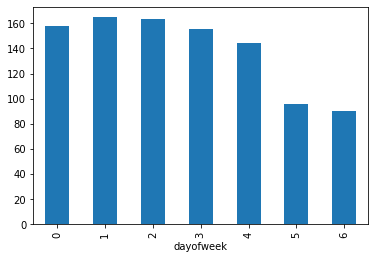

In [22]:
train.groupby('dayofweek')['Count'].mean().plot.bar()

The first 4 days of the week are most travelled

In [23]:
train.Timestmps = pd.to_datetime(train.Datetime,format = '%d-%m-%Y %H:%M')
train.index = train.Timestmps
hourly = train.resample('H').mean()
daily = train.resample('D').mean()
weekly = train.resample('W').mean()
monthly = train.resample('M').mean()

C:\Users\Muthondu\AppData\Local\Temp/ipykernel_15572/1038024823.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  train.Timestmps = pd.to_datetime(train.Datetime,format = '%d-%m-%Y %H:%M')


In [24]:
test.Timestmps = pd.to_datetime(test.Datetime,format = '%d-%m-%Y %H:%M')
test.index = test.Timestmps
daily = train.resample('D').mean()


C:\Users\Muthondu\AppData\Local\Temp/ipykernel_15572/3623444593.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  test.Timestmps = pd.to_datetime(test.Datetime,format = '%d-%m-%Y %H:%M')


Hourly plot

<AxesSubplot:title={'center':' Hourly'}, xlabel='Datetime'>

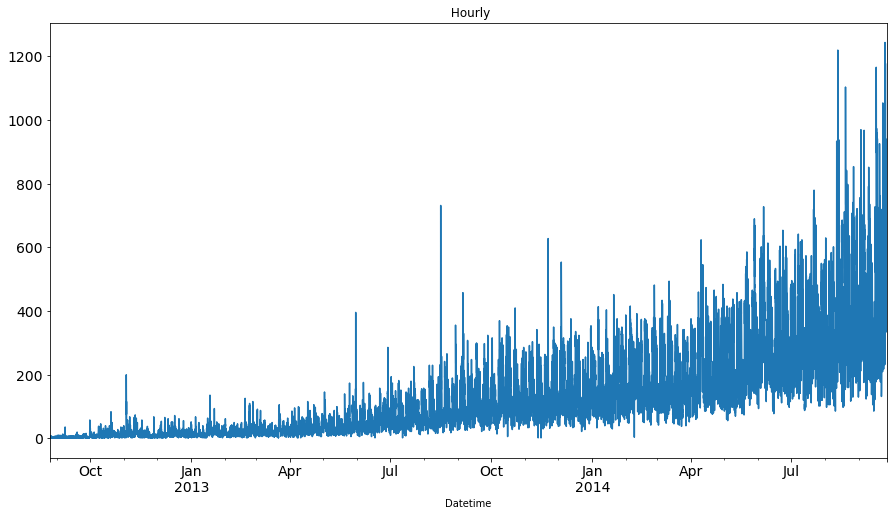

In [25]:
hourly.Count.plot(figsize=(15,8),title =' Hourly' ,fontsize= 14 )

Daily plot

<AxesSubplot:title={'center':' Daily'}, xlabel='Datetime'>

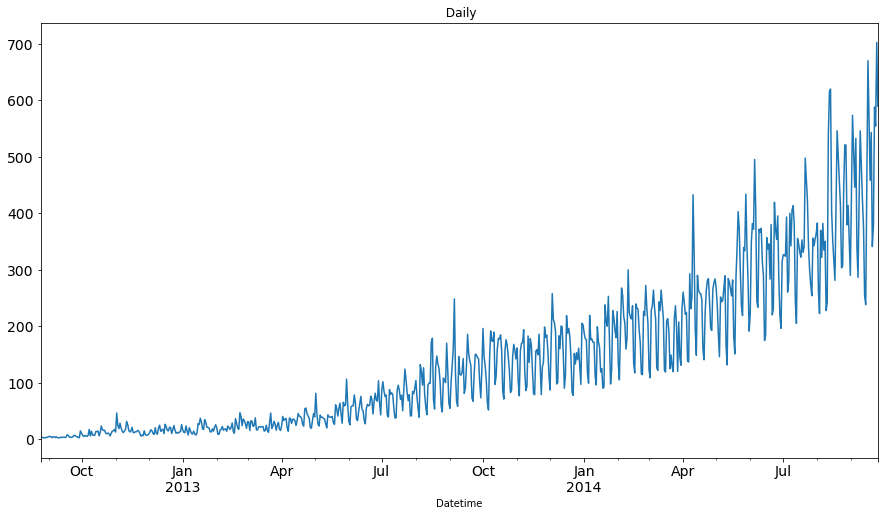

In [26]:
daily.Count.plot(figsize=(15,8),title =' Daily' ,fontsize= 14)

Weekly plot

<AxesSubplot:title={'center':' Weekly '}, xlabel='Datetime'>

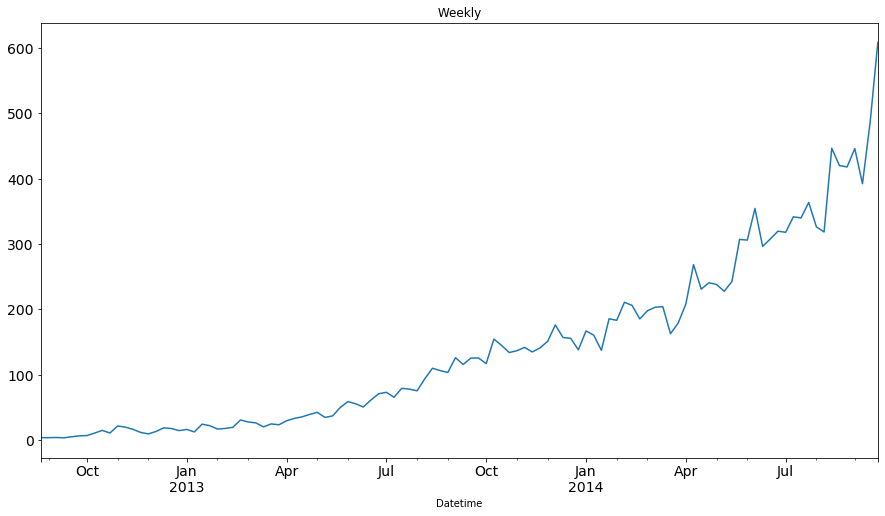

In [27]:
weekly.Count.plot(figsize=(15,8),title =' Weekly ' ,fontsize= 14 )

Monthly plot

<AxesSubplot:title={'center':' Monthly '}, xlabel='Datetime'>

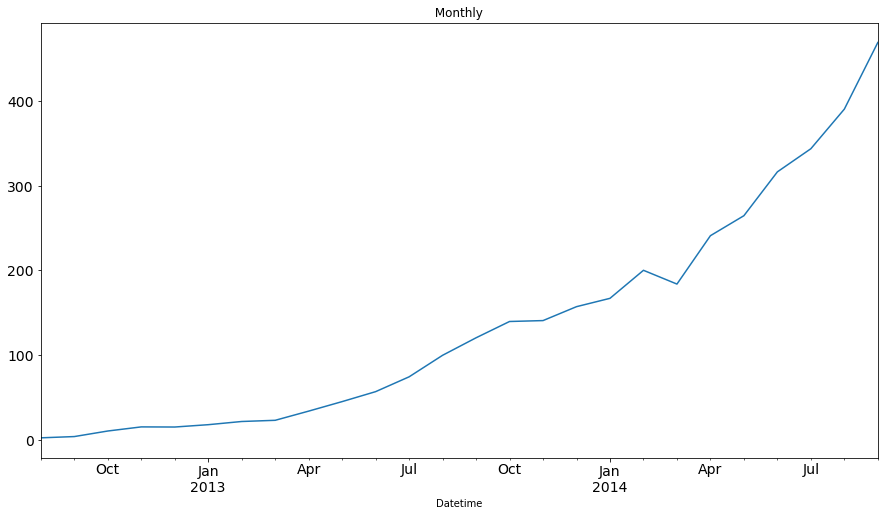

In [28]:
monthly.Count.plot(figsize=(15,8),title =' Monthly ' ,fontsize= 14)

## Modelling and evaluation

splitting data

In [30]:
Train = train.loc['2012-08-25':'2014-06-24']
valid = train.loc['2014-06-25':'2014-09-25']

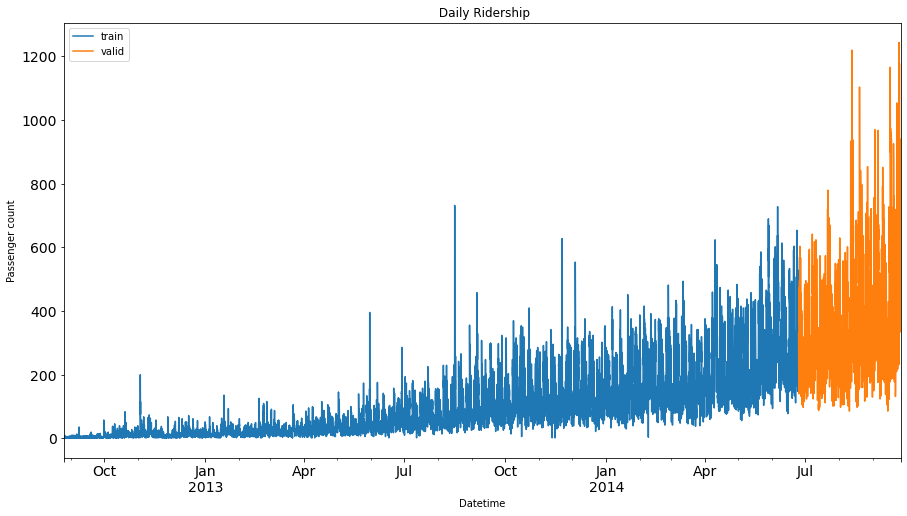

In [32]:
Train.Count.plot(figsize =(15,8), title = 'Daily Ridership' , fontsize = 14 , label = 'train')
valid.Count.plot(figsize = (15, 8),title = ' Daily Ridership' , fontsize = 14 , label = 'valid')
plt.xlabel('Datetime')
plt.ylabel('Passenger count')
plt.legend(loc = 'best')
plt.show()